In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import os
pd.set_option('display.max_columns', None)

In [42]:
df = pd.read_csv('merged_data_cleaned.csv')
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1182 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   int64  
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

Primero notar, que se trabajarán con variables como la especie (Target), el país de origen, la variedad, la altura, el método de procesado, entre otras.

In [44]:
df_Final = df[["Species","Country.of.Origin", "Harvest.Year", "Variety", "Processing.Method", "Category.One.Defects", "Category.Two.Defects", "Quakers", "altitude_mean_meters", "Total.Cup.Points"]]

In [5]:
df_Final

,Species,Country.of.Origin,Harvest.Year,Variety,Processing.Method,Category.One.Defects,Category.Two.Defects,Quakers,altitude_mean_meters,Total.Cup.Points
0,Arabica,Ethiopia,2014,NaN,Washed / Wet,0,0,0.0,2075.0,90.58
1,Arabica,Ethiopia,2014,Other,Washed / Wet,0,1,0.0,2075.0,89.92
2,Arabica,Guatemala,NaN,Bourbon,NaN,0,0,0.0,1700.0,89.75
3,Arabica,Ethiopia,2014,NaN,Natural / Dry,0,2,0.0,2000.0,89.00
4,Arabica,Ethiopia,2014,Other,Washed / Wet,0,2,0.0,2075.0,88.83
...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,Ecuador,2016,NaN,NaN,0,1,0.0,NaN,78.75
1335,Robusta,Ecuador,2016,NaN,NaN,0,0,0.0,40.0,78.08
1336,Robusta,United States,2014,NaN,Natural / Dry,0,6,0.0,795.0,77.17
1337,Robusta,India,2013,NaN,Natural / Dry,20,1,0.0,NaN,75.08


Valores Perdidos

In [6]:
df_Final.isna().sum()

Species                   0
Country.of.Origin         1
Harvest.Year             47
Variety                 226
Processing.Method       170
Category.One.Defects      0
Category.Two.Defects      0
Quakers                   1
altitude_mean_meters    230
Total.Cup.Points          0
dtype: int64

Por la naturaleza de los datos se procederá a dropear los NaN

In [7]:
df_Final.dropna(inplace=True)

C:\Users\Asus\AppData\Local\Temp/ipykernel_110252/3534910839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Final.dropna(inplace=True)


In [8]:
df_Final.reset_index(inplace=True)

In [23]:
df_Final.drop(["index"], axis = 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


duplicados

In [24]:
df.duplicated().any()

False

#### Análisis Estadístico y Exploratorio

In [25]:
df_Final.describe()

,Category.One.Defects,Category.Two.Defects,Quakers,altitude_mean_meters,Total.Cup.Points
count,975.000000,975.000000,975.000000,975.000000,975.000000
mean,0.400000,3.723077,0.141538,1835.134249,82.078636
std,1.963737,5.457059,0.725360,9241.496099,2.607844
min,0.000000,0.000000,0.000000,1.000000,59.830000
25%,0.000000,0.000000,0.000000,1100.000000,81.170000
50%,0.000000,2.000000,0.000000,1310.640000,82.420000
75%,0.000000,5.000000,0.000000,1600.000000,83.500000
max,31.000000,47.000000,11.000000,190164.000000,89.920000


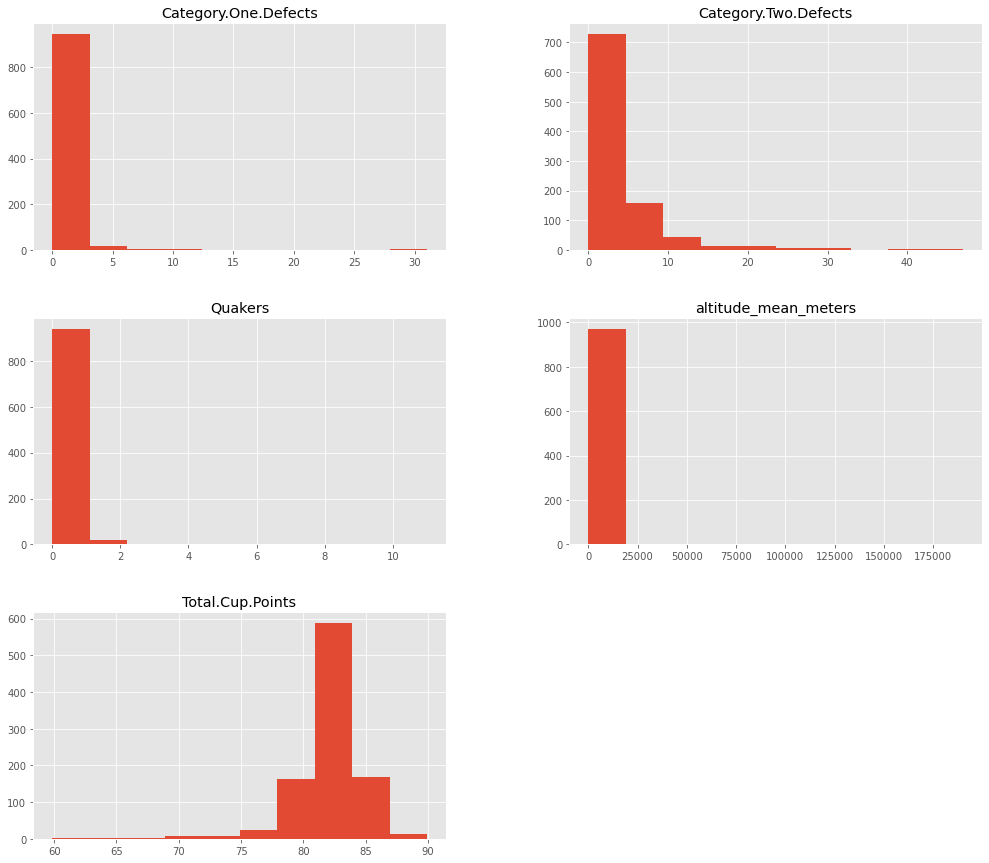

In [26]:
num_bins = 10
df_Final.hist(bins = num_bins, figsize=(17,15))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


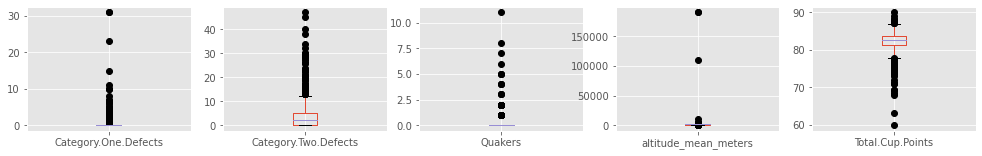

In [27]:
fig = plt.figure(figsize = (17,16))
ax = fig.gca()
df_Final.rename(columns=lambda x: str(x)).plot(ax=ax, kind= 'box', subplots=True, layout=(6,5), sym='black')
plt.show()

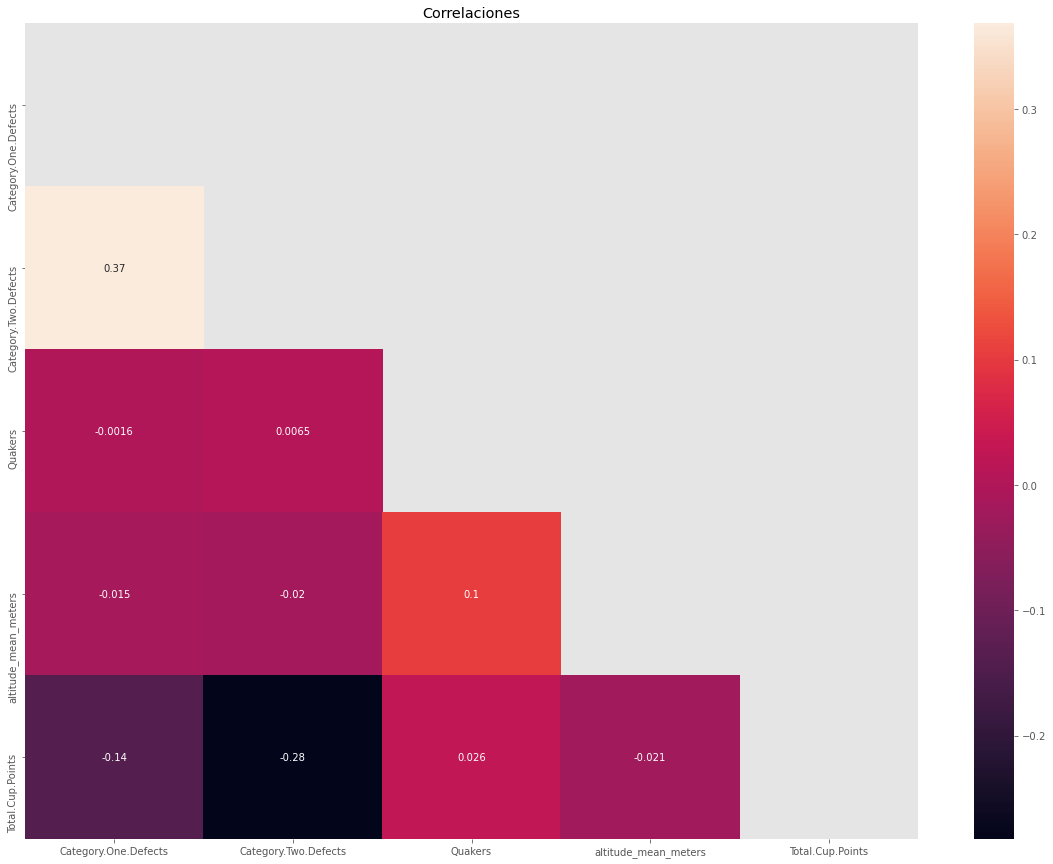

In [28]:
plt.rcParams['figure.figsize'] = (20, 15)

data_corr = df_Final.corr()

mask = np.triu(np.ones_like(data_corr, dtype=bool))

sns.heatmap(data_corr, annot = True, mask=mask)
plt.title('Correlaciones')
plt.show()

In [31]:
df_Final.columns

Index(['Species', 'Country.of.Origin', 'Harvest.Year', 'Variety',
       'Processing.Method', 'Category.One.Defects', 'Category.Two.Defects',
       'Quakers', 'altitude_mean_meters', 'Total.Cup.Points'],
      dtype='object')

<AxesSubplot:>

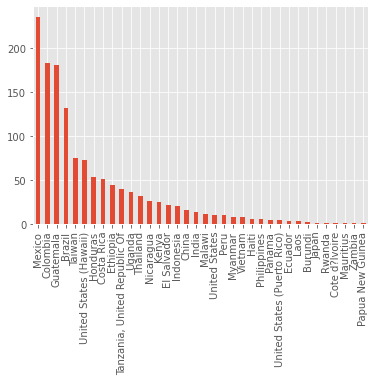

In [54]:
df_Final['Country.of.Origin'].value_counts().plot(kind='bar')

<AxesSubplot:>

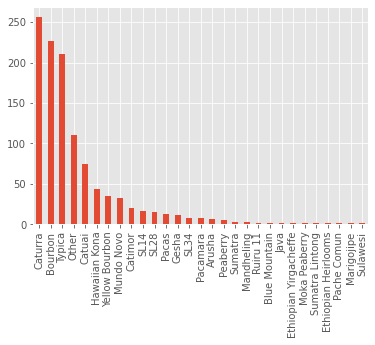

In [55]:
df_Final['Variety'].value_counts().plot(kind='bar')

<AxesSubplot:>

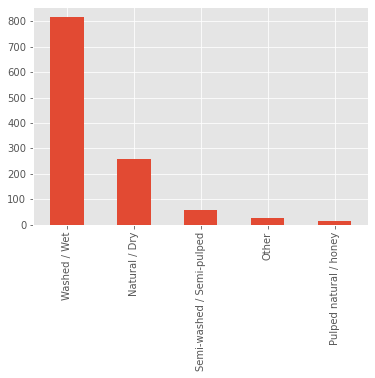

In [56]:
df_Final['Processing.Method'].value_counts().plot(kind='bar')

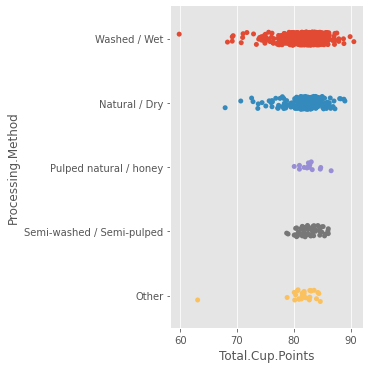

In [48]:
sns.catplot(x="Total.Cup.Points", y="Processing.Method", data=df_Final)

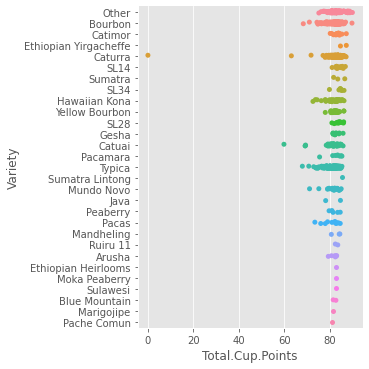

In [49]:
sns.catplot(x="Total.Cup.Points", y="Variety", data=df_Final)

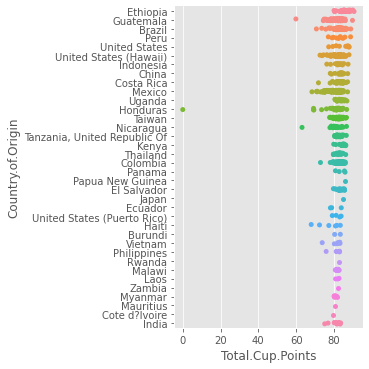

In [53]:
sns.catplot(x="Total.Cup.Points", y="Country.of.Origin", data=df_Final)